Predictive Analysis of Customer Bookings

This project aims to predict whether a customer will complete a flight booking based on their preferences and travel details. After preprocessing the data and selecting important features using Mutual Information, we handle class imbalance with SMOTE. Classification models like Random Forest and XGBoost are trained and evaluated, and the best model is saved for making future predictions from user inputs.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.read_csv("/content/customer_booking.csv",encoding ='latin-1')
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df2.info()#Understanding the various columns, dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
cols = df2.columns
print(cols)

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [5]:
df2.isnull().sum() #checking for the missing values

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [6]:
df2.describe()#statistical understanding

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
print(df2['flight_day'].unique())

['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


In [8]:
print(df2['num_passengers'].unique())

[2 1 3 4 6 5 7 9 8]


In [9]:
print(df2['booking_complete'].value_counts())

booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [10]:
print(df2['sales_channel'].unique())

['Internet' 'Mobile']


In [11]:
print(df2['booking_complete'].value_counts())

booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [12]:
#One-hot encoding
df2 = pd.get_dummies(df2,columns=['sales_channel','trip_type','flight_day','route','booking_origin'],drop_first = True)

In [13]:
df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,False,...,False,False,False,False,False,False,False,False,False,False
49996,1,111,6,4,0,0,0,5.62,0,False,...,False,False,False,False,False,False,False,False,False,False
49997,1,24,6,22,0,0,1,5.62,0,False,...,False,False,False,False,False,False,False,False,False,False
49998,1,15,6,11,1,0,1,5.62,0,False,...,False,False,False,False,False,False,False,False,False,False


Mutual Information :                                       
Mutual Information is used to measure the dependency between each feature and the target variable.
It captures both linear and non-linear relationships.
Features with higher MI scores are selected as they have more predictive power about the target.

In [18]:
from sklearn.feature_selection import mutual_info_classif

In [19]:
x = df2.drop('booking_complete',axis = 1)
y = df2['booking_complete']

In [20]:
mi_scores = mutual_info_classif(x,y,random_state =42)
mi_series = pd.Series(mi_scores, index = x.columns).sort_values(ascending = False)
print(mi_series)
top_features = mi_series.head(30).index
X_selected = x[top_features]

booking_origin_Australia    0.026178
booking_origin_Malaysia     0.020388
flight_duration             0.016376
route_PENTPE                0.008963
wants_extra_baggage         0.008438
                              ...   
route_HKGOOL                0.000000
route_HDYOOL                0.000000
route_HDYSYD                0.000000
route_HDYTPE                0.000000
route_KNOWUH                0.000000
Length: 918, dtype: float64


# **Random Forest**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000

Confusion Matrix:
 [[8362  158]
 [1283  197]]
ROC AUC Score: 0.5572817535845704
Accuracy: 0.8559


SMOTE is applied to address class imbalance in the target variable.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

print("Before SMOTE:")
print(y.value_counts())
print("After SMOTE:")
print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Before SMOTE:
booking_complete
0    42522
1     7478
Name: count, dtype: int64
After SMOTE:
booking_complete
0    42522
1    42522
Name: count, dtype: int64


In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      8444
           1       0.95      0.88      0.91      8565

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009

Confusion Matrix:
 [[8034  410]
 [1008 7557]]
ROC AUC Score: 0.9168782733426195
Accuracy: 0.9166323710976542


In [31]:
model_columns = x.columns.tolist()
print(model_columns)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed', 'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE', 'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL', 'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL', 'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU', 'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX', 'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER', 'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE', 'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'route_BKICTS', 'route_BKICTU', 'route_BKIDEL', 'route_BKIHND', 'route_BK

In [32]:
import joblib

# Saving model
joblib.dump(model, 'final_model.pkl')
joblib.dump(x.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']

Getting the top 20 important features

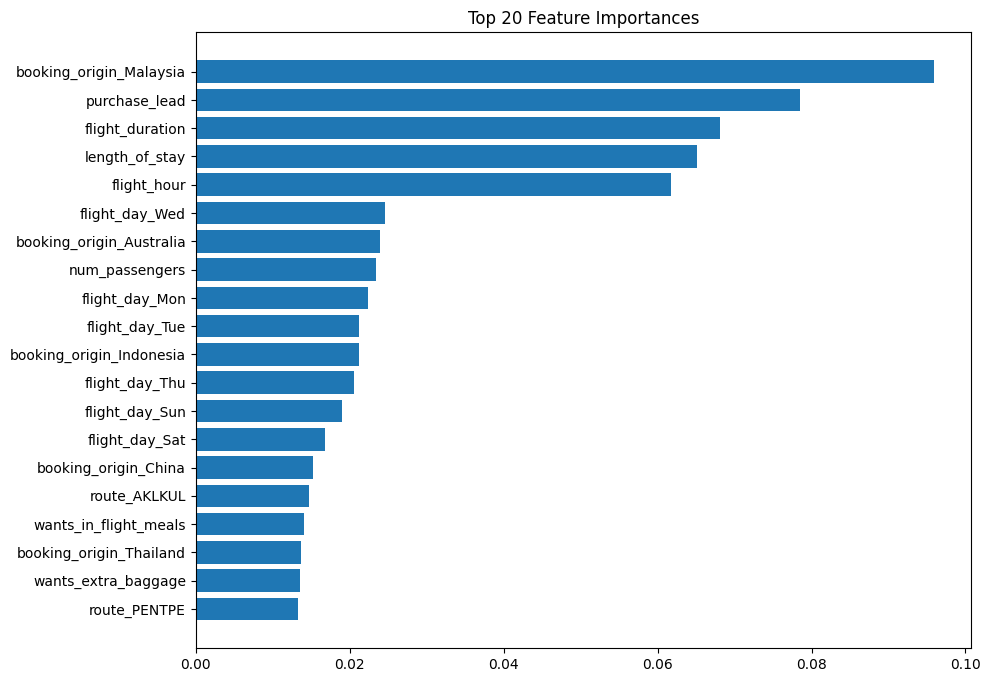

In [33]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(20), importances[indices[:20]])
plt.yticks(range(20), [x.columns[i] for i in indices[:20]])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.show()


In [34]:
top_20_features = [
    'route_BBIOOL', 'wants_in_flight_meals', 'length_of_stay', 'purchase_lead',
    'num_passengers', 'flight_duration', 'route_CANIKA', 'route_BWNMEL',
    'wants_extra_baggage', 'route_BLRSYD', 'flight_hour', 'route_CGKIKA',
    'route_CMBCTU', 'route_CKGTGG', 'flight_day_Mon', 'route_BKIICN',
    'route_BDOKIX', 'route_BDOHGH', 'route_BWNSYD', 'route_BDOTPE'
]


In [35]:
X_top20 = df2[top_20_features]
y = df2['booking_complete']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", model.score(X_test, y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      8520
           1       0.23      0.22      0.23      1480

    accuracy                           0.77     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.77      0.77      0.77     10000

Confusion Matrix:
 [[7402 1118]
 [1148  332]]
ROC AUC Score: 0.5465518335236645
Accuracy: 0.7734


# **XG BOOST**

In [37]:
from xgboost import XGBClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:16:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred = xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", xgb_model.score(X_test, y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      8444
           1       0.94      0.83      0.88      8565

    accuracy                           0.89     17009
   macro avg       0.89      0.89      0.89     17009
weighted avg       0.90      0.89      0.89     17009

Confusion Matrix:
 [[8024  420]
 [1468 7097]]
ROC AUC Score: 0.8894326634759742
Accuracy: 0.888999941207596


Sample Testing

In [41]:
import pandas as pd

def booking_prediction(sample_input_dict, model, model_columns):

    sample_input = pd.DataFrame([sample_input_dict])
    sample_encoded = pd.get_dummies(sample_input, drop_first=True)
    sample_aligned = sample_encoded.reindex(columns=model_columns, fill_value=0)
    prediction = model.predict(sample_aligned)
    return prediction[0]


model = joblib.load('final_model.pkl')
model_columns = joblib.load('model_columns.pkl')


sample_input_dict = {
    'num_passengers': 2,
    'purchase_lead': 27,
    'length_of_stay': 6,
    'flight_hour': 9,
    'wants_extra_baggage': 1,
    'wants_preferred_seat': 0,
    'wants_in_flight_meals': 1,
    'flight_duration': 5.62,
    'sales_channel': 'Internet',
    'trip_type': 'RoundTrip',
    'flight_day': 'Sat',
    'route': 'PERPNH',
    'booking_origin': 'Australia'
}


result = booking_prediction(sample_input_dict, model, model_columns)
print("Booking prediction:", "Yes" if result == 1 else "No")


Booking prediction: No
